KNN MODEL

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
file_path = 'covid_19_india.csv'
data = pd.read_csv(file_path)

In [ ]:
# Replace '-' with NaN and convert to numeric
data[['ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured']] = data[
    ['ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured']
].replace('-', np.nan).apply(pd.to_numeric, errors='coerce')

In [ ]:
# Handle missing values (replace NaN with column means for numeric columns only)
numeric_columns = ['ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured']
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [ ]:
# Define features and target
X = data[['ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured']].values  # Features
y = data['Confirmed'].values  # Target

In [ ]:
# Optional: Convert the target into binary classes (e.g., High vs. Low)
threshold = data['Confirmed'].mean()
data['ConfirmedBinary'] = np.where(data['Confirmed'] > threshold, 'High', 'Low')
y = data['ConfirmedBinary'].values

In [ ]:
# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [ ]:
# Initialize and train the KNN model
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Make predictions
y_pred = knn_model.predict(X_test)

In [ ]:
# Display results
print("Predictions and their corresponding true labels:")
for i, (pred, true) in enumerate(zip(y_pred, y_test)):
    pred_label = label_encoder.inverse_transform([pred])[0]
    true_label = label_encoder.inverse_transform([true])[0]
    print(f"Test Sample {i+1}: Predicted = {pred_label}, Actual = {true_label}")

Predictions and their corresponding true labels:
Test Sample 1: Predicted = Low, Actual = Low
Test Sample 2: Predicted = Low, Actual = Low
Test Sample 3: Predicted = Low, Actual = Low
Test Sample 4: Predicted = Low, Actual = Low
Test Sample 5: Predicted = High, Actual = High
Test Sample 6: Predicted = Low, Actual = Low
Test Sample 7: Predicted = Low, Actual = Low
Test Sample 8: Predicted = Low, Actual = Low
Test Sample 9: Predicted = Low, Actual = Low
Test Sample 10: Predicted = Low, Actual = Low
Test Sample 11: Predicted = Low, Actual = Low
Test Sample 12: Predicted = Low, Actual = Low
Test Sample 13: Predicted = High, Actual = High
Test Sample 14: Predicted = High, Actual = High
Test Sample 15: Predicted = Low, Actual = Low
Test Sample 16: Predicted = Low, Actual = Low
Test Sample 17: Predicted = Low, Actual = Low
Test Sample 18: Predicted = High, Actual = High
Test Sample 19: Predicted = Low, Actual = Low
Test Sample 20: Predicted = Low, Actual = High
Test Sample 21: Predicted = Low

In [ ]:
# Manual inspection of neighbors for each test point
for i, test_point in enumerate(X_test):
    distances = np.sqrt(((X_train - test_point) ** 2).sum(axis=1))
    nearest_neighbors_indices = np.argsort(distances)[:k]
    print(f"\nTest Point {i+1}: {test_point}")
    for j, idx in enumerate(nearest_neighbors_indices):
        neighbor_label = label_encoder.inverse_transform([y_train[idx]])[0]
        print(f"Neighbor {j+1}: Distance = {distances[idx]:.2f}, Label = {neighbor_label}")


Test Point 1: [12.18834081  1.4955157   7.        ]
Neighbor 1: Distance = 0.00, Label = Low
Neighbor 2: Distance = 0.00, Label = Low
Neighbor 3: Distance = 0.00, Label = Low

Test Point 2: [12.18834081  1.4955157   0.        ]
Neighbor 1: Distance = 0.00, Label = Low
Neighbor 2: Distance = 0.00, Label = Low
Neighbor 3: Distance = 0.00, Label = Low

Test Point 3: [12.18834081  1.4955157   0.        ]
Neighbor 1: Distance = 0.00, Label = Low
Neighbor 2: Distance = 0.00, Label = Low
Neighbor 3: Distance = 0.00, Label = Low

Test Point 4: [12.18834081  1.4955157   0.        ]
Neighbor 1: Distance = 0.00, Label = Low
Neighbor 2: Distance = 0.00, Label = Low
Neighbor 3: Distance = 0.00, Label = Low

Test Point 5: [ 12.18834081   1.4955157  477.        ]
Neighbor 1: Distance = 30.00, Label = High
Neighbor 2: Distance = 41.00, Label = High
Neighbor 3: Distance = 66.00, Label = High

Test Point 6: [6. 0. 0.]
Neighbor 1: Distance = 0.00, Label = Low
Neighbor 2: Distance = 0.00, Label = Low
Nei

In [ ]:
# Optional: Evaluate the model's accuracy
accuracy = knn_model.score(X_test, y_test)
print(f"\nModel Accuracy: {accuracy:.2%}")


Model Accuracy: 94.14%


SVM


In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # Using a linear kernel
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [ ]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 93.45%


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
              precision    recall  f1-score   support

        High       0.95      0.71      0.82        59
         Low       0.93      0.99      0.96       231

    accuracy                           0.93       290
   macro avg       0.94      0.85      0.89       290
weighted avg       0.94      0.93      0.93       290



In [ ]:
# Display predictions
print("\nPredictions and their corresponding true labels:")
for i, (pred, true) in enumerate(zip(y_pred, y_test)):
    pred_label = label_encoder.inverse_transform([pred])[0]
    true_label = label_encoder.inverse_transform([true])[0]
    print(f"Test Sample {i+1}: Predicted = {pred_label}, Actual = {true_label}")


Predictions and their corresponding true labels:
Test Sample 1: Predicted = Low, Actual = Low
Test Sample 2: Predicted = Low, Actual = Low
Test Sample 3: Predicted = Low, Actual = Low
Test Sample 4: Predicted = Low, Actual = Low
Test Sample 5: Predicted = High, Actual = High
Test Sample 6: Predicted = Low, Actual = Low
Test Sample 7: Predicted = Low, Actual = Low
Test Sample 8: Predicted = Low, Actual = Low
Test Sample 9: Predicted = Low, Actual = Low
Test Sample 10: Predicted = Low, Actual = Low
Test Sample 11: Predicted = Low, Actual = Low
Test Sample 12: Predicted = Low, Actual = Low
Test Sample 13: Predicted = High, Actual = High
Test Sample 14: Predicted = High, Actual = High
Test Sample 15: Predicted = Low, Actual = Low
Test Sample 16: Predicted = Low, Actual = Low
Test Sample 17: Predicted = Low, Actual = Low
Test Sample 18: Predicted = High, Actual = High
Test Sample 19: Predicted = Low, Actual = Low
Test Sample 20: Predicted = Low, Actual = High
Test Sample 21: Predicted = Lo

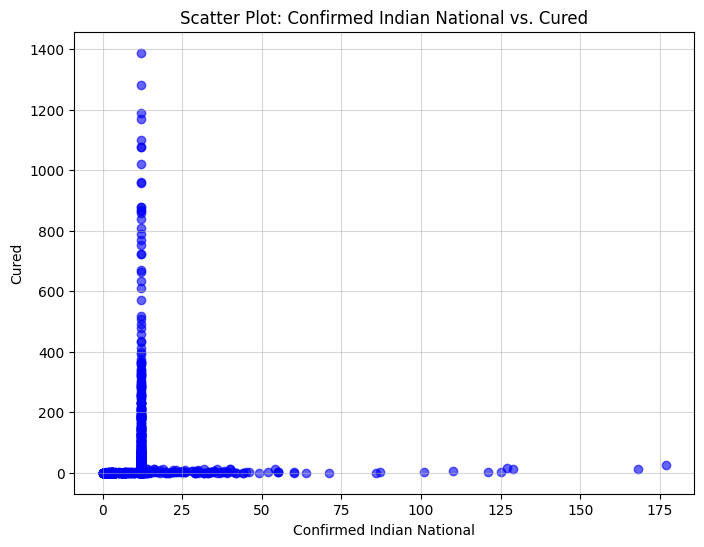

In [ ]:
# Scatter Plot: Relationship between two features
plt.figure(figsize=(8, 6))
plt.scatter(data['ConfirmedIndianNational'], data['Cured'], alpha=0.6, c='blue')
plt.title("Scatter Plot: Confirmed Indian National vs. Cured")
plt.xlabel("Confirmed Indian National")
plt.ylabel("Cured")
plt.grid(alpha=0.5)
plt.show()

<ipython-input-31-482c8a1c8a70>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CuredCategory', y='Confirmed', data=data, palette="Blues")


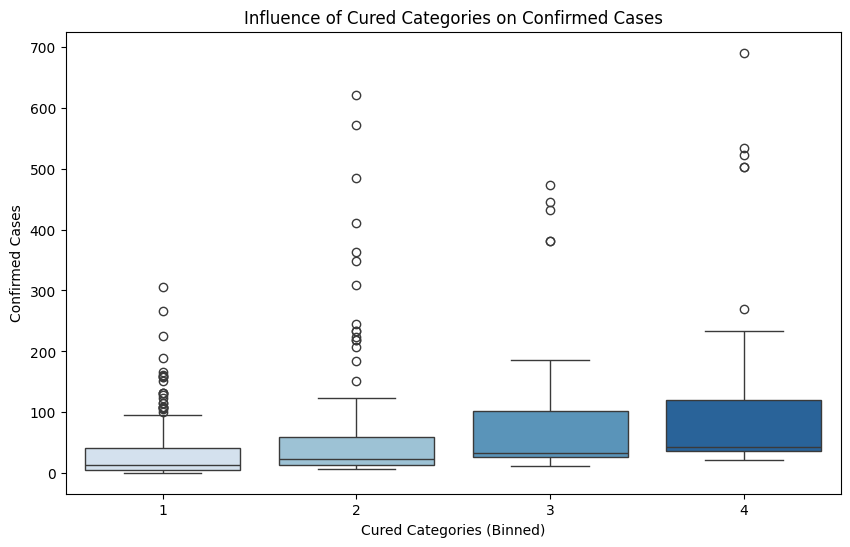

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from a CSV file
file_path = 'covid_19_india.csv'  # Path to your CSV file
data = pd.read_csv(file_path)

# Replace '-' with NaN and convert to numeric
data[['ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured']] = data[
    ['ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured']
].replace('-', np.nan).apply(pd.to_numeric, errors='coerce')

# Handle missing values (replace NaN with column means for numeric columns only)
numeric_columns = ['ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured']
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Categorize 'Cured' into bins (like Weekly Study Hours)
data['CuredCategory'] = pd.cut(
    data['Cured'], bins=[0, 5, 10, 15, 20], labels=[1, 2, 3, 4]
)

# Box Plot: CuredCategory vs Confirmed
plt.figure(figsize=(10, 6))
sns.boxplot(x='CuredCategory', y='Confirmed', data=data, palette="Blues")

# Add titles and labels
plt.title("Influence of Cured Categories on Confirmed Cases")
plt.xlabel("Cured Categories (Binned)")
plt.ylabel("Confirmed Cases")
plt.show()


Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 95.52%


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
              precision    recall  f1-score   support

        High       0.96      0.81      0.88        59
         Low       0.95      0.99      0.97       231

    accuracy                           0.96       290
   macro avg       0.96      0.90      0.93       290
weighted avg       0.96      0.96      0.95       290



In [ ]:
# Display predictions
print("\nPredictions and their corresponding true labels:")
for i, (pred, true) in enumerate(zip(y_pred, y_test)):
    pred_label = label_encoder.inverse_transform([pred])[0]
    true_label = label_encoder.inverse_transform([true])[0]
    print(f"Test Sample {i+1}: Predicted = {pred_label}, Actual = {true_label}")


Predictions and their corresponding true labels:
Test Sample 1: Predicted = Low, Actual = Low
Test Sample 2: Predicted = Low, Actual = Low
Test Sample 3: Predicted = Low, Actual = Low
Test Sample 4: Predicted = Low, Actual = Low
Test Sample 5: Predicted = High, Actual = High
Test Sample 6: Predicted = Low, Actual = Low
Test Sample 7: Predicted = Low, Actual = Low
Test Sample 8: Predicted = Low, Actual = Low
Test Sample 9: Predicted = Low, Actual = Low
Test Sample 10: Predicted = Low, Actual = Low
Test Sample 11: Predicted = Low, Actual = Low
Test Sample 12: Predicted = Low, Actual = Low
Test Sample 13: Predicted = High, Actual = High
Test Sample 14: Predicted = High, Actual = High
Test Sample 15: Predicted = Low, Actual = Low
Test Sample 16: Predicted = Low, Actual = Low
Test Sample 17: Predicted = Low, Actual = Low
Test Sample 18: Predicted = High, Actual = High
Test Sample 19: Predicted = Low, Actual = Low
Test Sample 20: Predicted = Low, Actual = High
Test Sample 21: Predicted = Lo